<br><br>
<p style="font-size:24px; color:#216594;text-align:center;">
Applied AI in Chemical and Process Engineering
</p>

<p style="font-size:30px; color:black;text-align:center;">
    Bulding ML pipeline for Reactor data
</p>


███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
<br>


**Week 3-4**

This notebook will build a pipeline to prepare data and develop an ML algorithm


# Content

**Part 1: Data Preprocessing & Exploration**

| Step                  | Description                                                                 | Key Actions & Tools                                                                                     |
|-----------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Data Preparation**  | Gather, load, and inspect raw data                                          | - Load dataset (e.g., CSV, DB)<br>- Check data types, shape, initial samples (`df.head()`, `df.info()`) |
| **Data Cleaning**     | Fix issues in data quality                                                  | - Handle missing values (impute or drop)<br>- Remove duplicates<br>- Detect and treat outliers (IQR, Z-score) |
| **Exploratory Data Analysis (EDA)** | Understand data distributions and relationships                   | - Visualizations: histograms, scatter plots, pair plots<br>- Correlation matrix (heatmaps)<br>- Summary statistics |

**Part 2: Modeling & Interpretation**

| Step                                  | Description                                                                 | Key Actions & Tools                                                                                     |
|---------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Normalization (Principle Only)**    | Scale features to same range (e.g., for distance-based models)              | - Apply Min-Max Scaling or Standardization<br>- Justify choice based on model needs (e.g., SVM, KNN, Neural Networks) |
| **Model Training, Validation & Testing** | Build and evaluate model performance                                    | - Split data: `train_test_split`<br>- Train models (e.g., Linear Regression, Random Forest, XGBoost)<br>- Use cross-validation<br>- Evaluate using metrics (RMSE, MAE, R², etc.) |
| **Model Explanation with XAI**        | Interpret model predictions and feature importance                          | - Use SHAP, LIME, or feature importance plots<br>- Explain predictions to stakeholders<br>- Ensure transparency and trust |

**Note:** Since our example does not have categorical data, we do not encode variables - which is essential if the data is categorical

# Ethanol Production - Sugar Industry

![Process Flow Diagram](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/etoh_flowdiagram.png?raw=1)


**Our goal is to model residual sugar. The model can be later used to optimize the fermentation process**

**Data**
- Temperature °C: Fermentation tank
- pH: Fermentation tank
- Yeast Concentration g/L: Fermentation tank
- Sugar Concentration w/v: Dilution tank (input for fermenation)
- Residual Sugar g/L: Post-fermentation


Note: The data is simualted data


**Prompt:**

Print first 15 rows of the table and the dimensions of the table

# Data Preperation

**Prompt:**
Load data from below github
https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv


In [2]:
import pandas as pd

# URL of the CSV file
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head(15))

    Temperature   pH  Yeast_Concentration  Sugar_Concentration  Residual_Sugar
0          28.7  5.0                  1.2                 12.3             5.3
1          34.5  5.4                  2.3                 10.0             5.4
2          32.3  5.1                  4.1                 17.3             3.2
3          31.0  4.3                  3.8                 19.7             2.7
4          26.6  4.0                  4.2                 12.2             5.5
5          26.6  4.4                  3.1                 16.6             5.2
6          25.6  4.9                  2.8                 17.4             5.2
7          33.7  4.1                  1.6                 18.5             7.6
8          31.0  4.7                  2.3                 14.2             5.1
9          32.1  4.9                  2.7                 13.0             3.9
10         25.2  4.5                  1.4                 13.3             7.5
11         34.7  5.2                  1.9           

# Data Cleaning

| Step           | Purpose                                      | Common Methods                                                                 | Notes                                                                 |
|----------------|----------------------------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Missing Data** | Handle incomplete or null values             | - Remove rows/columns<br>- Impute with mean/median/mode<br>- KNN/imputation models | Can bias models; choice depends on amount and reason for missingness |
| **Duplicates**   | Remove redundant data entries                | - Identify and drop duplicate rows<br>- Use `pandas.drop_duplicates()`           | Prevents overfitting and skewed results                              |
| **Outliers**     | Detect and manage extreme values             | - Z-score, IQR method<br>- Visualization (box plots, scatter plots)<br>- Winsorizing | Can distort models; keep if meaningful (e.g., fraud detection)       |

## Check for missing data

**Prompt:**
Check if the table has missing values

In [3]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv(url)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Optional: Show the total number of missing values
print(f"\nTotal missing values in the dataset: {df.isnull().sum().sum()}")

Missing values per column:
Temperature            0
pH                     0
Yeast_Concentration    0
Sugar_Concentration    2
Residual_Sugar         0
dtype: int64

Total missing values in the dataset: 2


## Fill the missing data wiht median using imputer

**Prompt:**
Fill the missing data with median value

In [4]:
# Step 2: Fill missing values with median for numeric columns only
# Select only numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Fill NaN values with median for each numeric column
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median(numeric_only=True))

# Step 3: Verify that there are no more missing values in numeric columns
print("\nMissing values after filling with median:")
print(df.isnull().sum())

print(f"\nTotal missing values after filling: {df.isnull().sum().sum()}")


Missing values after filling with median:
Temperature            0
pH                     0
Yeast_Concentration    0
Sugar_Concentration    0
Residual_Sugar         0
dtype: int64

Total missing values after filling: 0


## Check for duplicates

**Prompt:**

Check if it has duplicates

In [5]:
# Step 1: Check for duplicate rows
print("Number of duplicate rows (all columns identical):", df.duplicated().sum())

# Step 2: Show the actual duplicate rows (if any)
if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")

# Step 3 (Optional): Remove duplicates if needed
# Uncomment the next line to drop duplicates and keep only the first occurrence
# df_cleaned = df.drop_duplicates().reset_index(drop=True)

# Final shape after potential cleaning
print(f"\nDataset shape before removing duplicates: {df.shape}")
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")

Number of duplicate rows (all columns identical): 0

No duplicate rows found.

Dataset shape before removing duplicates: (972, 5)
Dataset shape after removing duplicates: (972, 5)


# Exploratory Dara Analysis (EDA)

## Summary Stats

**Prompt:**

## Data Visualization

### Data Visualization with Box Plot


![Box plot](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/boxplot.png?raw=1)


**Prompt:**

Create box plots for all variables in multiple plots in single figure. show outliers

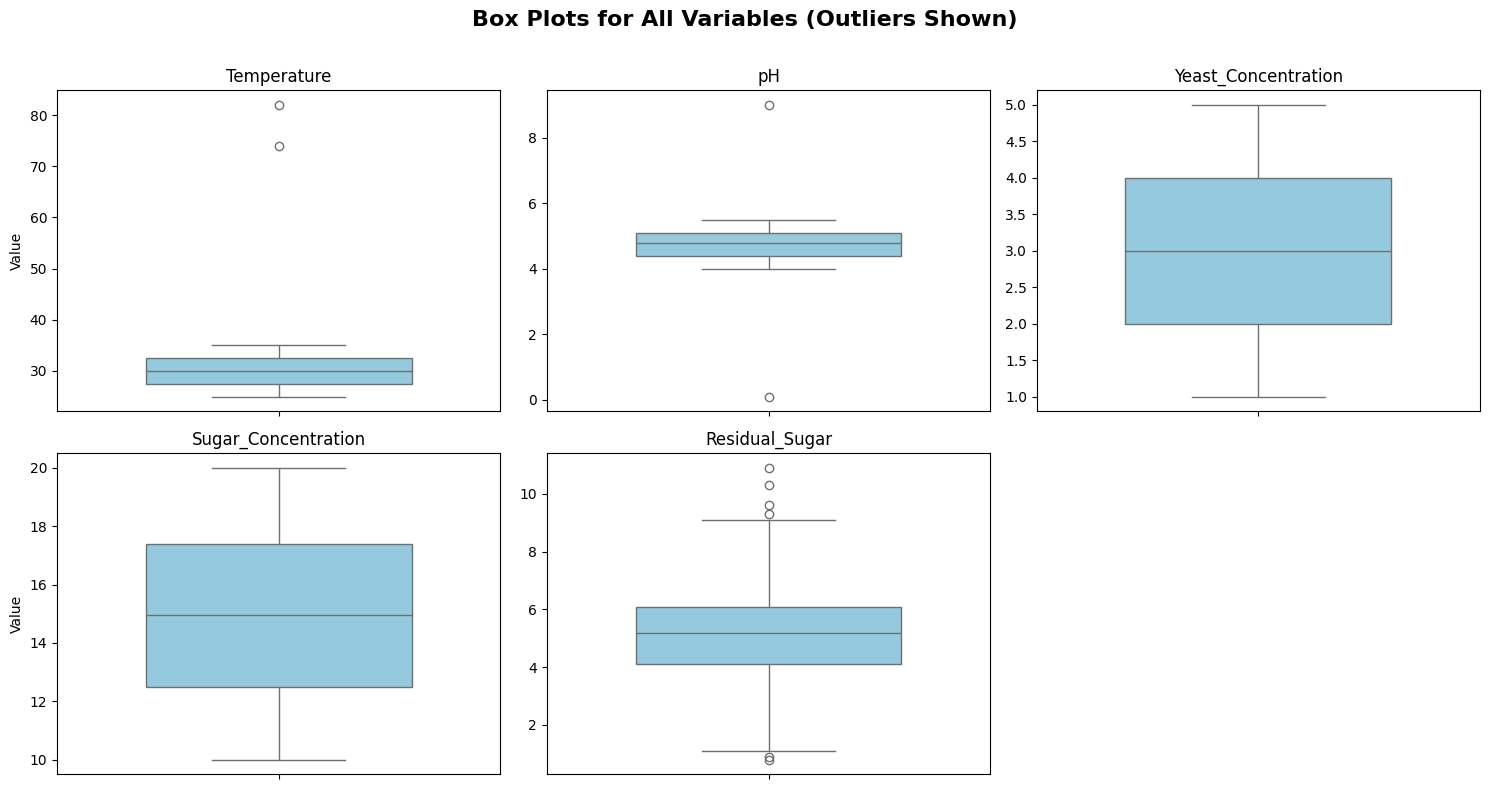

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the dataset
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv(url)

# Fill missing values with median (for numeric columns)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median(numeric_only=True))

# Select only numeric columns for box plots
df_numeric = df[numeric_columns]

# Determine layout size (number of rows and columns for subplots)
n_cols = 3  # You can adjust this for better layout
n_plots = len(df_numeric.columns)
n_rows = math.ceil(n_plots / n_cols)

# Set up the figure
plt.figure(figsize=(15, n_rows * 4))
plt.suptitle("Box Plots for All Variables (Outliers Shown)", fontsize=16, fontweight='bold', y=0.98)

# Create a box plot for each numeric variable
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_numeric[col], color='skyblue', width=0.6)
    plt.title(f'{col}', fontsize=12)
    plt.ylabel('Value' if i % n_cols == 1 else '')  # Only label y-axis on first column
    plt.xlabel('')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle
plt.show()

### Data Visualization with Violine plot


![Violin plot](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/violinplot.png?raw=1)


**Prompt:**

Create violine plots for all variables in multiple plots in single figure.

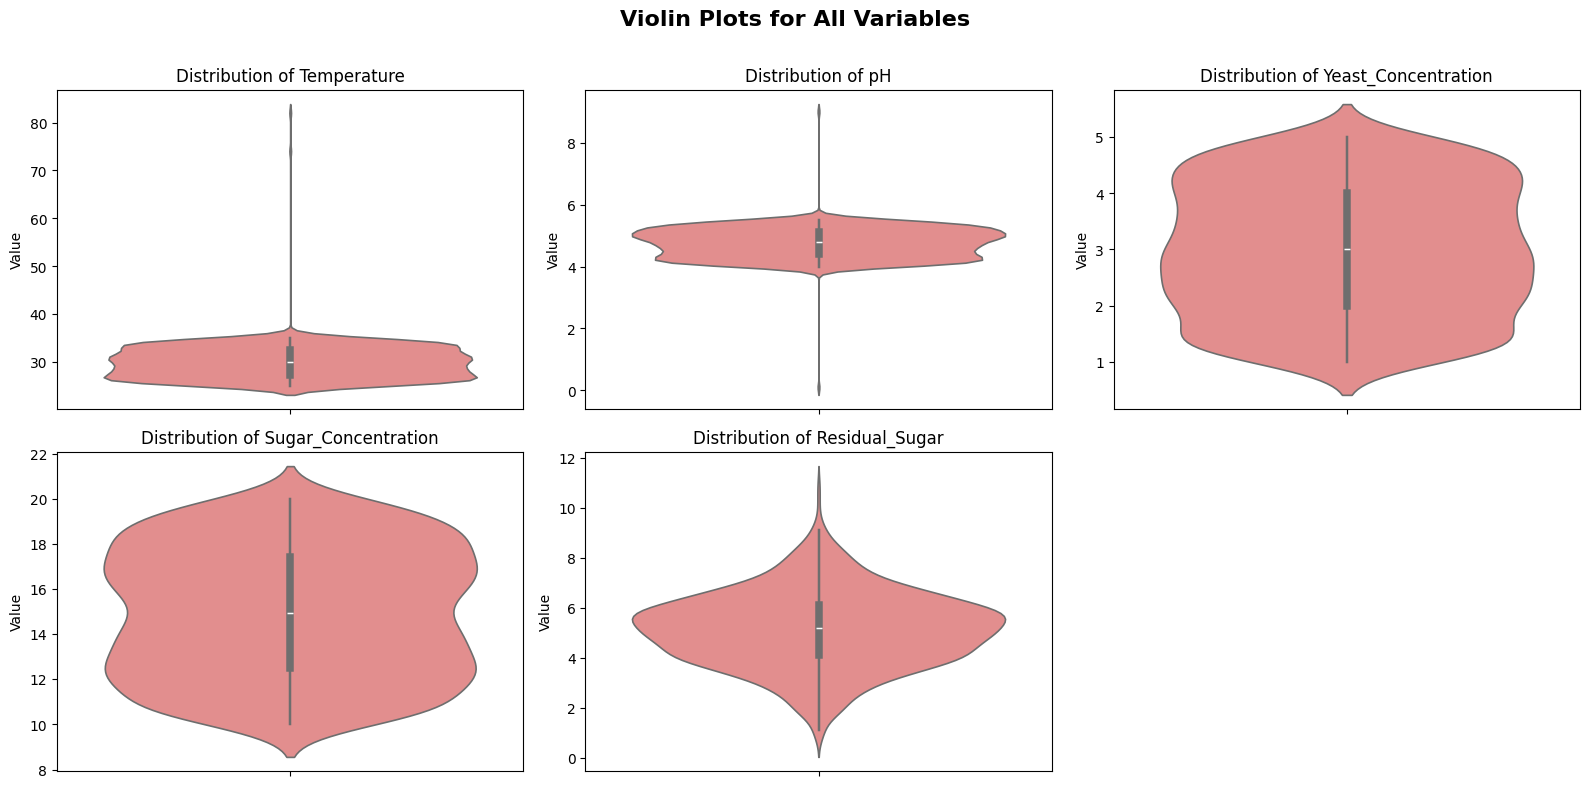

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the dataset
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv(url)

# Fill missing values with median (for numeric columns)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median(numeric_only=True))

# Select only numeric columns for violin plots
df_numeric = df[numeric_columns]

# Determine layout: number of rows and columns for subplots
n_cols = 3  # Number of plots per row
n_plots = len(df_numeric.columns)
n_rows = math.ceil(n_plots / n_cols)

# Set up the figure
plt.figure(figsize=(16, n_rows * 4))
plt.suptitle("Violin Plots for All Variables", fontsize=16, fontweight='bold', y=0.98)

# Create a violin plot for each numeric variable
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(y=df_numeric[col], color='lightcoral', inner='box', linewidth=1.2)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle
plt.show()

### Data Visualization with Histogram plot

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure.

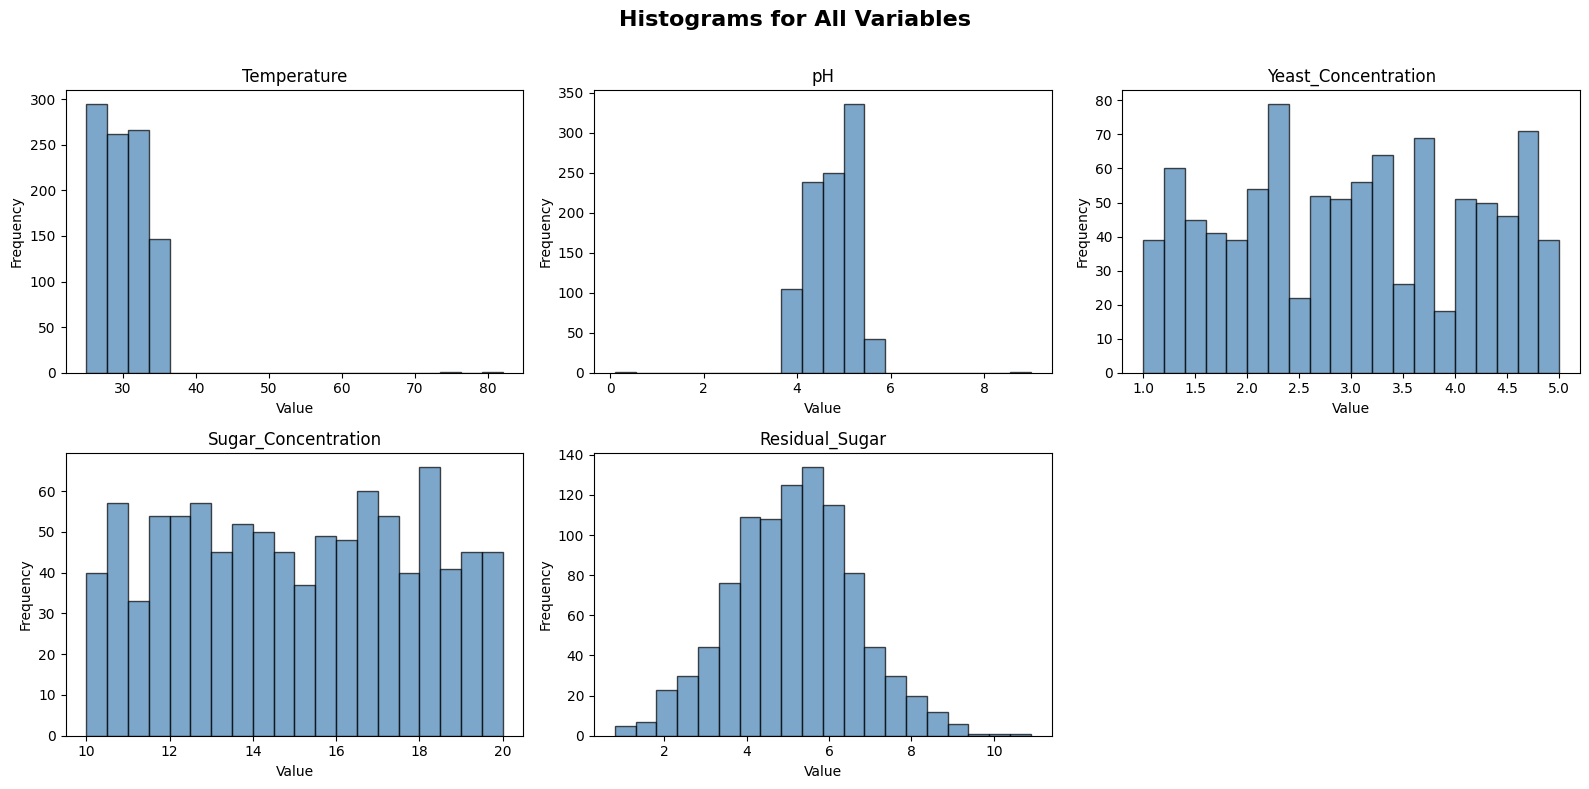

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv(url)

# Fill missing values with median (for numeric columns)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median(numeric_only=True))

# Select only numeric columns for histograms
df_numeric = df[numeric_columns]

# Determine layout: number of rows and columns for subplots
n_cols = 3  # Number of plots per row
n_plots = len(df_numeric.columns)
n_rows = math.ceil(n_plots / n_cols)

# Set up the figure
plt.figure(figsize=(16, n_rows * 4))
plt.suptitle("Histograms for All Variables", fontsize=16, fontweight='bold', y=0.98)

# Create a histogram for each numeric variable
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_numeric[col], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle
plt.show()

## Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

**Prompt:**

Remove all outliers of df using IQR method and create a table called dfclean

In [10]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv"
df = pd.read_csv(url)

# Fill missing values with median (for numeric columns)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median(numeric_only=True))

# Create a copy to clean
dfclean = df.copy()

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    df_filtered = df.copy()
    total_removed = 0
    for col in cols:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before removing
        is_outlier = ~df_filtered[col].between(lower_bound, upper_bound)
        n_outliers = is_outlier.sum()
        if n_outliers > 0:
            print(f"Outliers found in '{col}': {n_outliers}")

        total_removed += n_outliers
        # Keep only rows within the bounds
        df_filtered = df_filtered[~is_outlier]
    print(f"Total outliers removed: {total_removed}")
    return df_filtered

# Apply IQR outlier removal
dfclean = remove_outliers_iqr(dfclean, numeric_columns)

# Reset index after removal
dfclean = dfclean.reset_index(drop=True)

# Display results
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape (dfclean): {dfclean.shape}")
print(f"Rows removed: {df.shape[0] - dfclean.shape[0]}")

Outliers found in 'Temperature': 2
Outliers found in 'Residual_Sugar': 6
Total outliers removed: 8

Original shape: (972, 5)
Cleaned shape (dfclean): (964, 5)
Rows removed: 8


### Histogram plot with cleaned data

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure using dfclean

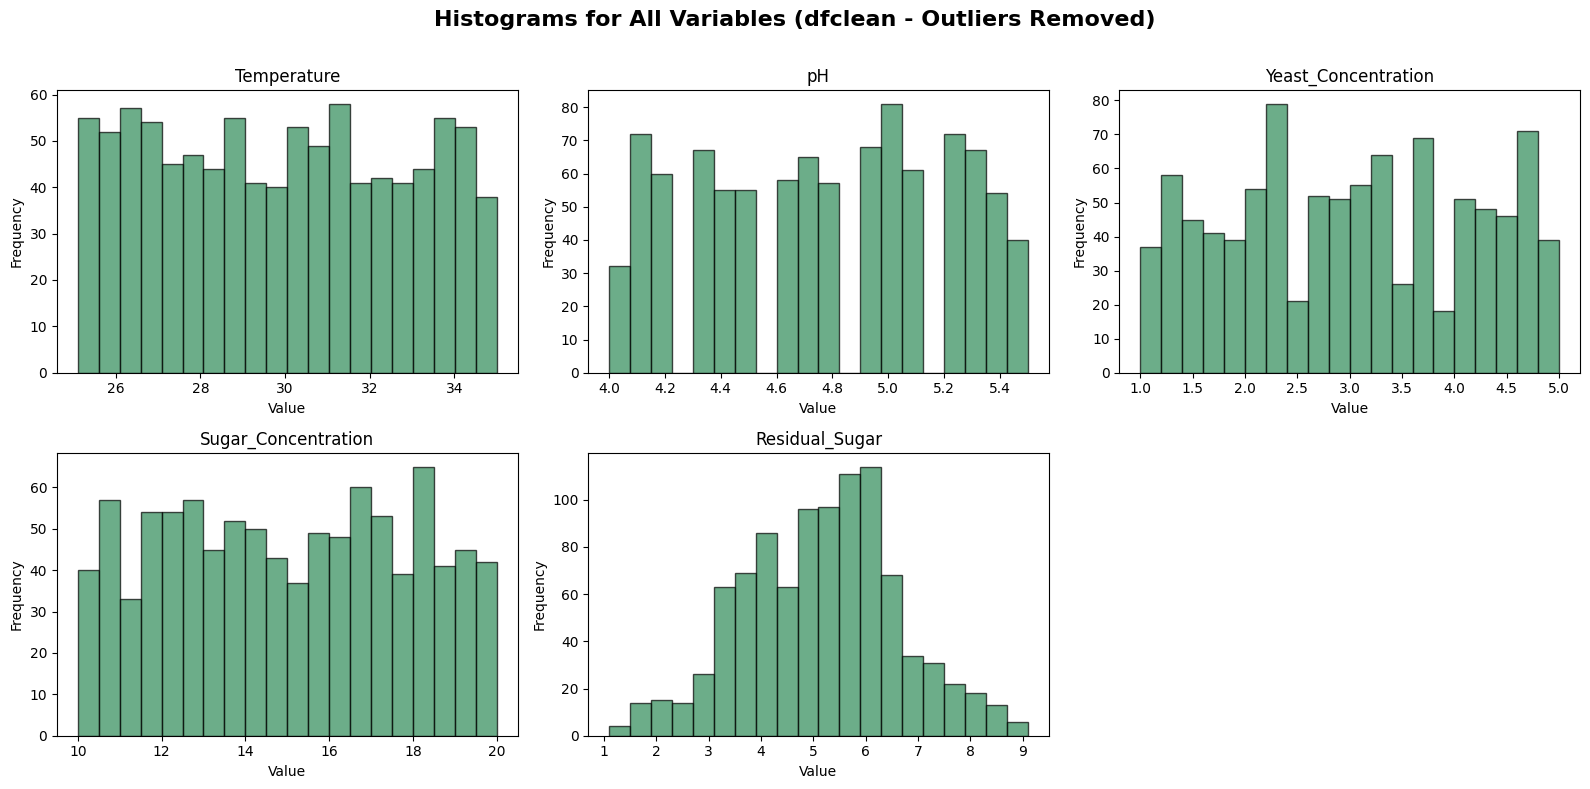

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming dfclean already exists from previous step (with outliers removed and missing values filled)

# Select only numeric columns
numeric_columns = dfclean.select_dtypes(include='number').columns
df_numeric_clean = dfclean[numeric_columns]

# Determine layout: number of rows and columns for subplots
n_cols = 3  # plots per row
n_plots = len(df_numeric_clean.columns)
n_rows = math.ceil(n_plots / n_cols)

# Set up the figure
plt.figure(figsize=(16, n_rows * 4))
plt.suptitle("Histograms for All Variables (dfclean - Outliers Removed)",
             fontsize=16, fontweight='bold', y=0.98)

# Create a histogram for each numeric variable
for i, col in enumerate(df_numeric_clean.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_numeric_clean[col], bins=20, color='seagreen', edgecolor='black', alpha=0.7)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for suptitle
plt.show()

## Corelinearity

**Prompt:**

Print correlations matrix and do a plot a heatmap of correlation of dfclean

Correlation Matrix:
                     Temperature     pH  Yeast_Concentration  \
Temperature                1.000 -0.012               -0.009   
pH                        -0.012  1.000                0.016   
Yeast_Concentration       -0.009  0.016                1.000   
Sugar_Concentration       -0.015  0.004                0.006   
Residual_Sugar            -0.012 -0.027               -0.510   

                     Sugar_Concentration  Residual_Sugar  
Temperature                       -0.015          -0.012  
pH                                 0.004          -0.027  
Yeast_Concentration                0.006          -0.510  
Sugar_Concentration                1.000           0.102  
Residual_Sugar                     0.102           1.000  


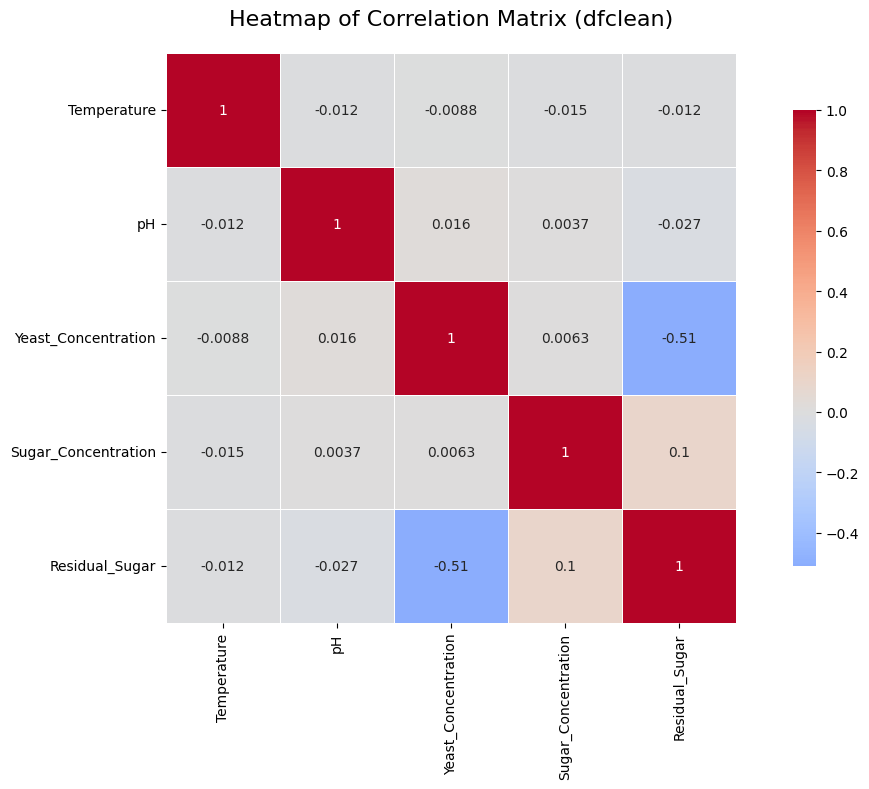

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure dfclean is available and contains numeric data
df_numeric = dfclean.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,      # ←←← This was likely incomplete before
    cbar_kws={"shrink": 0.8}
)
plt.title("Heatmap of Correlation Matrix (dfclean)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Data Prep for Model

## Define Features and Target

**Prompt:**

'Residual_Sugar' is Y variables and Temperature','pH','Yeast_Concentration','Sugar_Concentration' are features. Plot scatter plot between features and Y

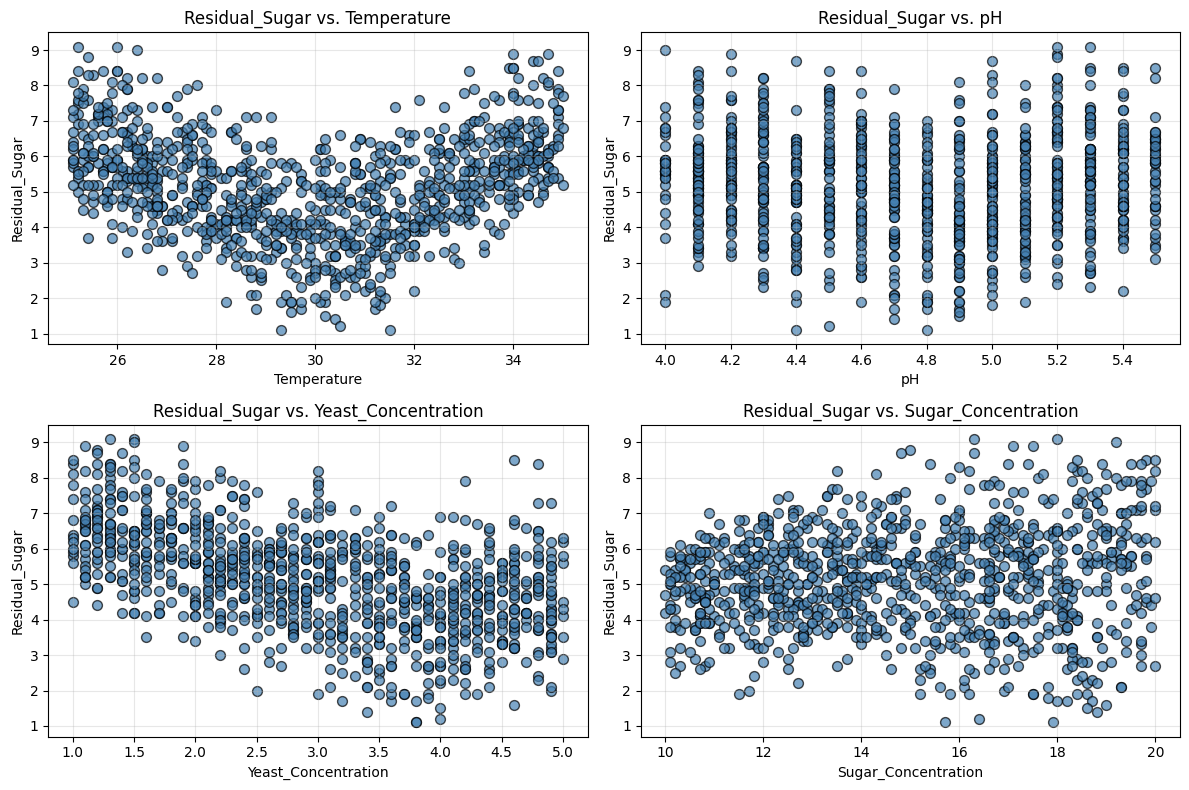

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure we're using dfclean (cleaned data without outliers)
# Define Y and features
Y = 'Residual_Sugar'
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']

# Check if all required columns exist
missing_cols = [col for col in features + [Y] if col not in dfclean.columns]
if missing_cols:
    raise ValueError(f"Missing columns in dfclean: {missing_cols}")

# Set up the plot layout
n_features = len(features)
n_cols = 2  # 2 plots per row
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each feature vs. Residual_Sugar
for i, feature in enumerate(features):
    axes[i].scatter(dfclean[feature], dfclean[Y], alpha=0.7, color='steelblue', edgecolors='k', s=50)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(Y)
    axes[i].set_title(f'{Y} vs. {feature}')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots (if any)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Feature Engineering with Data Scaling

**Prompt:**

Normalize X data using StandarScaler and plot histogram

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform (don't fit) on test set

# Convert scaled arrays back to pandas DataFrames for easier handling (optional but helpful)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)

# Confirm scaling: mean ≈ 0, std ≈ 1
print("After scaling - Training set mean (should be ~0):")
print(np.mean(X_train_scaled, axis=0))
print("\nAfter scaling - Training set std (should be ~1):")
print(np.std(X_train_scaled, axis=0))

After scaling - Training set mean (should be ~0):
[-5.08660045e-16  5.48193209e-16 -1.37048302e-16  3.16265313e-17]

After scaling - Training set std (should be ~1):
[1. 1. 1. 1.]


# Model Selection


![Model guide](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/model_selection.png?raw=1)

# XGBoost Model


**Note:**

Since this is tree model which does not require feature scaling in general, we **will not** use scaled data for model fitting


<p style="font-size:25px; color:blue;text-align:left;">
    XGBoost
</p>



    🔘 XGBoost is a machine learning algorithm that builds multiple decision trees one after another, where each new tree tries to fix the errors made by the previous trees.

    🔘 It uses a method called gradient boosting, which helps improve prediction accuracy by combining many weak models into a stronger one.
    
    🔘The algorithm includes features to prevent overfitting, such as regularization and controlling how the trees grow.

    🔘 XGBoost can handle large datasets efficiently by using parallel processing to speed up training.

    🔘 It is widely used because it is fast, accurate, and works well for tasks like classification and regression, making it popular among beginners and experts alike.

![xgboost](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/xgboost.png?raw=1)

References:

[XGboost paper](https://arxiv.org/abs/1603.02754)

## Data Split

![data split](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/datasplit.jpg?raw=1)

**Prompt**

Split the data into training and testing sets.

In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']
target = 'Residual_Sugar'

X = dfclean[features]  # Feature matrix
y = dfclean[target]    # Target vector

# Split the data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for testing, 70% for training
    random_state=42,      # For reproducibility
    shuffle=True          # Shuffle the data before splitting
)

# Display shapes
print("Data split completed (70/30):")
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set:  X_test  = {X_test.shape}, y_test  = {y_test.shape}")

# Optional: Show first few rows of training data
print("\nFirst 5 rows of X_train:")
print(X_train.head())

print(f"\nFirst 5 values of y_train:")
print(y_train.head())

Data split completed (70/30):
Training set: X_train = (674, 4), y_train = (674,)
Testing set:  X_test  = (290, 4), y_test  = (290,)

First 5 rows of X_train:
     Temperature   pH  Yeast_Concentration  Sugar_Concentration
672         26.1  4.2                  2.4                 14.5
228         32.9  5.1                  3.7                 13.7
450         34.1  4.2                  1.6                 12.6
874         27.3  4.4                  4.7                 12.1
212         32.1  4.2                  1.4                 17.3

First 5 values of y_train:
672    6.7
228    4.2
450    7.0
874    5.1
212    7.6
Name: Residual_Sugar, dtype: float64


## Hyperparameter Optimization
| Parameter             | Purpose                              | Simple Explanation | Default |
|-----------------------|--------------------------------------|--------------------|---------|
| `n_estimators`        | Number of decision trees             | More trees = more learning, but too many can overdo it. Like having more experts vote on the answer. <br> ✅ **Typical tuned range:** 100–300 | `100` |
| `max_depth`           | How deep each tree can go            | Controls complexity. Deeper = more detailed rules, but may memorize data. Like allowing more "if-then" steps. <br> ✅ **Typical tuned range:** 3–10 | `6` |
| `learning_rate`       | How fast the model learns            | Smaller = slow, steady improvement. Larger = fast but may overshoot. Like step size toward the goal. <br> ✅ **Typical tuned range:** 0.01 – 0.3 | `0.3` |
| `subsample`           | % of data used for each tree         | Uses only part of the data per tree to avoid overfitting. Like asking different small groups to learn. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `colsample_bytree`    | % of features used per tree          | Each tree uses only some columns (e.g., size, age, location). Prevents over-reliance on one feature. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `min_child_weight`    | Minimum data in a prediction box     | Stops trees from splitting too small. “Don’t make a rule unless at least a few examples agree.” <br> ✅ **Typical tuned range:** 1 – 7 | `1` |
| `gamma`               | Minimum improvement to split         | Only split if it clearly helps. Like saying: “Only add a rule if it makes things meaningfully better.” <br> ✅ **Typical tuned range:** 0 – 0.5 | `0` |
| `reg_alpha`           | Simplifies model (L1 penalty)        | Shrinks weak signals to zero. Helps when many inputs are noisy or irrelevant. <br> ✅ **Typical tuned range:** 0 – 1 | `0` |
| `reg_lambda`          | Smooths predictions (L2 penalty)     | Keeps predictions stable by avoiding extreme values. Works like a safety brake. <br> ✅ **Typical tuned range:** 1 – 2 | `1` |

### Grid Search

🔘 Grid Search is like trying all possible combinations of settings to find the best one — just like testing different oven temperatures and baking times to make the perfect cake.

🔘 It automatically tests every combination of hyperparameters (like learning_rate=0.1, max_depth=6) you specify, trains the model each time, and picks the one with the best performance.

🔘 It uses cross-validation (e.g., 5-fold) to ensure the result is reliable and not just lucky on one data split.

🔘 Think of it as "brute-force tuning" — thorough, systematic, and great for finding optimal settings, but can be slow with too many parameters.

*Example: If you test 5 values for max_depth, and 5 values for n_estimators, Grid Search will try all 5x5=25 combinations and tell you which works best.*
     


![grid](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/grid_search.png?raw=1)

## K-fold Cross validation

In K-fold cross-validation, the data is split into K equal parts (folds). The model is trained K times, each time leaving out one fold for testing and using the other K-1 folds for training. The final performance metric is averaged over all K runs. This approach uses the entire dataset for both training and testing, providing a more reliable estimate of model performance.


**Prompt:**

Finetune below hyperparamters of xgboost with 5 fold cross validation. Print R2/RMSE of testing and training

```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

```

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# --- 1. Define the model and parameter grid ---
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# --- 2. Grid Search with 5-Fold Cross-Validation ---
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',           # Optimize for R²
    cv=5,                   # 5-fold cross-validation
    n_jobs=-1,              # Use all available cores
    verbose=1,              # Show progress
    refit=True              # Refit best model on entire training set
)

# Fit grid search on scaled training data
grid_search.fit(X_train_scaled_df, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

print("✅ Best Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
✅ Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}


In [18]:
# Predictions on training set (using best model)
y_train_pred = best_xgb.predict(X_train_scaled_df)
# Predictions on testing set
y_test_pred = best_xgb.predict(X_test_scaled_df)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print results
print("\n📈 Model Performance:")
print(f"Training R²  : {train_r2:.4f}")
print(f"Testing R²   : {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE : {test_rmse:.4f}")


📈 Model Performance:
Training R²  : 0.8699
Testing R²   : 0.8111
Training RMSE: 0.5291
Testing RMSE : 0.6399


# Model Evaluation

**Prompt:**
Evaluate the model as below.
1. Plot actual vs predicted values for both train and test
2. Print R2/RMSE on the graph
3. Plot residual for both training and testing


## Residual Plot

![residual](https://github.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/blob/main/assets/residualplot.png?raw=1)


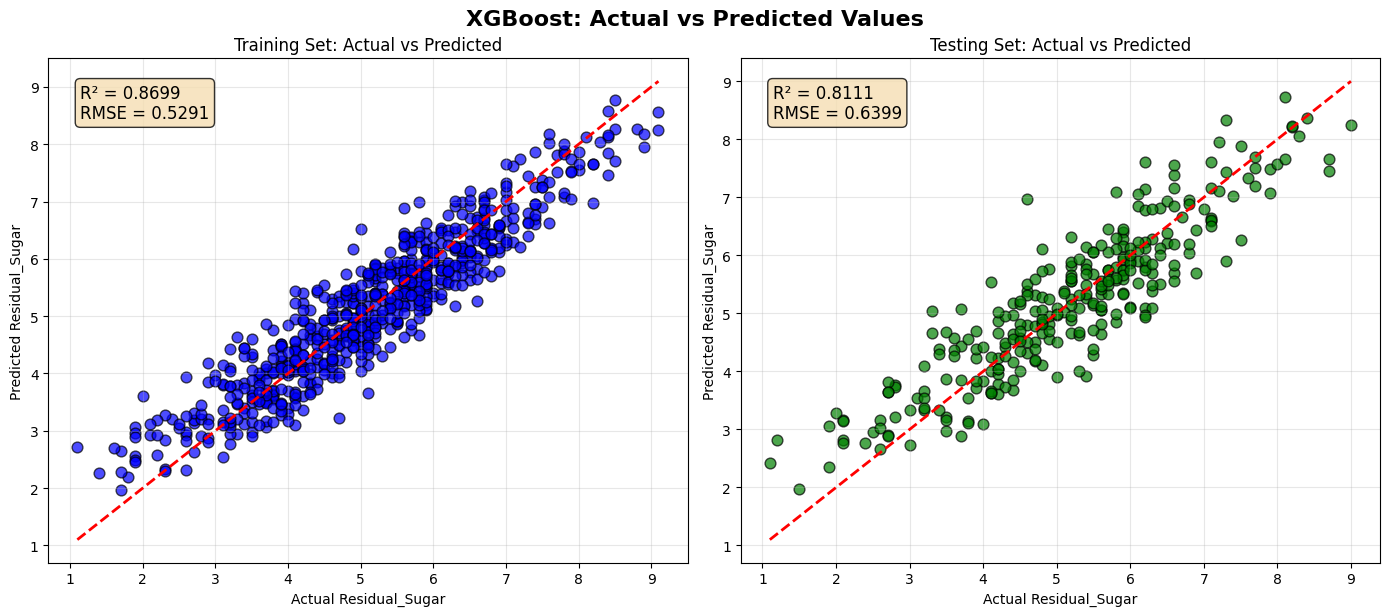

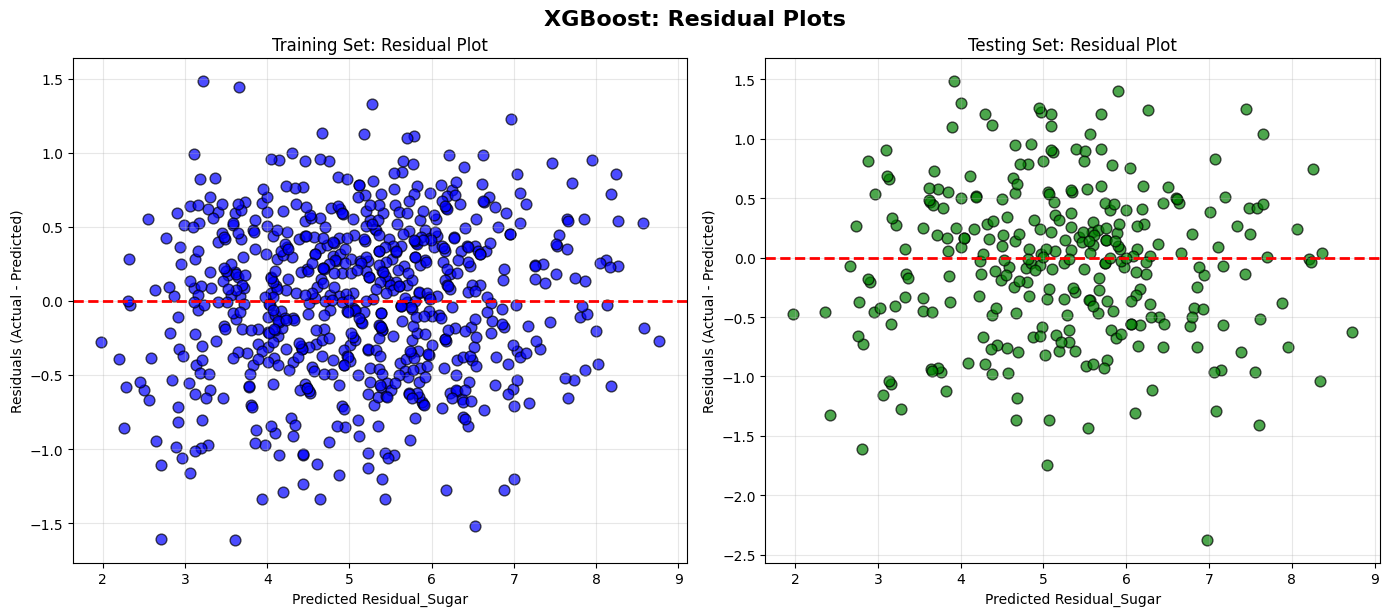

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_train_pred = best_xgb.predict(X_train_scaled_df)
y_test_pred = best_xgb.predict(X_test_scaled_df)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------
# FIGURE 1: Actual vs Predicted
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axs[0].scatter(y_train, y_train_pred, alpha=0.7, color='blue', edgecolors='k', s=60)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axs[0].set_xlabel('Actual Residual_Sugar')
axs[0].set_ylabel('Predicted Residual_Sugar')
axs[0].set_title('Training Set: Actual vs Predicted')
axs[0].grid(True, alpha=0.3)

# Annotate metrics on training plot
axs[0].text(0.05, 0.95, f'R² = {train_r2:.4f}\nRMSE = {train_rmse:.4f}',
            transform=axs[0].transAxes, fontsize=12,
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
            verticalalignment='top')

# Testing set
axs[1].scatter(y_test, y_test_pred, alpha=0.7, color='green', edgecolors='k', s=60)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[1].set_xlabel('Actual Residual_Sugar')
axs[1].set_ylabel('Predicted Residual_Sugar')
axs[1].set_title('Testing Set: Actual vs Predicted')
axs[1].grid(True, alpha=0.3)

# Annotate metrics on testing plot
axs[1].text(0.05, 0.95, f'R² = {test_r2:.4f}\nRMSE = {test_rmse:.4f}',
            transform=axs[1].transAxes, fontsize=12,
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8),
            verticalalignment='top')

plt.tight_layout()
plt.suptitle('XGBoost: Actual vs Predicted Values', fontsize=16, y=1.02, weight='bold')
plt.show()

# -------------------------------
# FIGURE 2: Residual Plots
# -------------------------------
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axs[0].scatter(y_train_pred, residuals_train, alpha=0.7, color='blue', edgecolors='k', s=60)
axs[0].axhline(y=0, color='r', linestyle='--', lw=2)
axs[0].set_xlabel('Predicted Residual_Sugar')
axs[0].set_ylabel('Residuals (Actual - Predicted)')
axs[0].set_title('Training Set: Residual Plot')
axs[0].grid(True, alpha=0.3)

# Testing residuals
axs[1].scatter(y_test_pred, residuals_test, alpha=0.7, color='green', edgecolors='k', s=60)
axs[1].axhline(y=0, color='r', linestyle='--', lw=2)
axs[1].set_xlabel('Predicted Residual_Sugar')
axs[1].set_ylabel('Residuals (Actual - Predicted)')
axs[1].set_title('Testing Set: Residual Plot')
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('XGBoost: Residual Plots', fontsize=16, y=1.02, weight='bold')
plt.show()

## Training

## Save final model

**Prompt:**

Save the model in pickle format

In [20]:
import pickle
import os

# Define filenames
model_filename = 'xgboost_model.pkl'
scaler_filename = 'standard_scaler.pkl'
feature_names_filename = 'feature_names.pkl'

# Save the best XGBoost model
with open(model_filename, 'wb') as f:
    pickle.dump(best_xgb, f)

# Save the scaler
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names (important for matching input format later)
with open(feature_names_filename, 'wb') as f:
    pickle.dump(features, f)

print("✅ Model and preprocessing objects saved successfully:")
print(f"  - Model: {os.path.abspath(model_filename)}")
print(f"  - Scaler: {os.path.abspath(scaler_filename)}")
print(f"  - Feature names: {os.path.abspath(feature_names_filename)}")

✅ Model and preprocessing objects saved successfully:
  - Model: /content/xgboost_model.pkl
  - Scaler: /content/standard_scaler.pkl
  - Feature names: /content/feature_names.pkl


# Model Explanation with XAI